In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

In [76]:
data = pd.read_csv(r'E:\INTERN\Asterisc Technocrat Pvt. Ltd intern\INSTAGRAM REACH\Instagram-Reach.csv')

In [77]:
data

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532
...,...,...
360,2023-03-27T00:00:00,15622
361,2023-03-28T00:00:00,18645
362,2023-03-29T00:00:00,41238
363,2023-03-30T00:00:00,50490


In [78]:
data.dtypes

Date               object
Instagram reach     int64
dtype: object

In [79]:
data.isnull().sum()

Date               0
Instagram reach    0
dtype: int64

In [80]:
data['Date'] = pd.DataFrame(data['Date'])

In [81]:
data.dtypes

Date               object
Instagram reach     int64
dtype: object

In [82]:
data[['date', "extra"]] = data['Date'].str.split("T", expand=True)

In [83]:
data = data.drop(columns=['Date', 'extra'])

In [84]:
data

,Instagram reach,date
0,7620,2022-04-01
1,12859,2022-04-02
2,16008,2022-04-03
3,24349,2022-04-04
4,20532,2022-04-05
...,...,...
360,15622,2023-03-27
361,18645,2023-03-28
362,41238,2023-03-29
363,50490,2023-03-30


In [85]:
data['date'] = pd.to_datetime(data['date'])

In [86]:
data.dtypes

Instagram reach             int64
date               datetime64[ns]
dtype: object

In [87]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [88]:
data = data.sort_values(by=['year', 'month'], ascending=True)

In [89]:
data = data[['Instagram reach', 'date']]

In [90]:
data

,Instagram reach,date
0,7620,2022-04-01
1,12859,2022-04-02
2,16008,2022-04-03
3,24349,2022-04-04
4,20532,2022-04-05
...,...,...
360,15622,2023-03-27
361,18645,2023-03-28
362,41238,2023-03-29
363,50490,2023-03-30


<Axes: xlabel='date', ylabel='Instagram reach'>

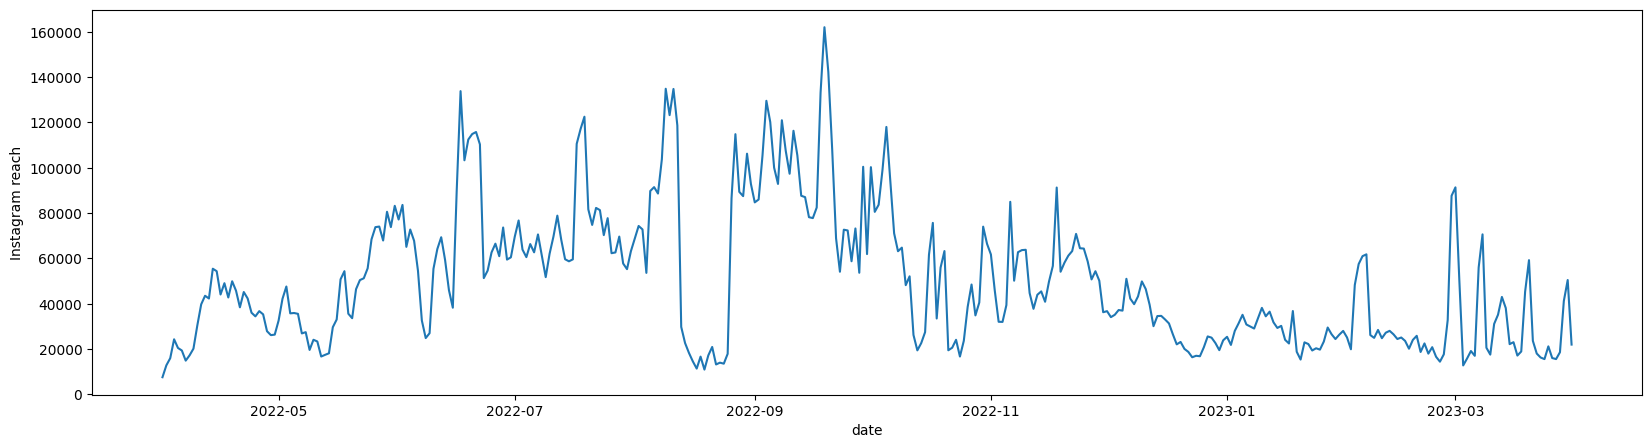

In [91]:
plt.figure(figsize=(20,5))
sns.lineplot(data, x='date', y='Instagram reach')

In [92]:
data = data[['date', 'Instagram reach']]

In [93]:
data.columns=['ds','y']

In [94]:
m= Prophet()

In [95]:
model = m.fit(data)

13:15:06 - cmdstanpy - INFO - Chain [1] start processing
13:15:06 - cmdstanpy - INFO - Chain [1] done processing


In [96]:
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)

In [97]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-04-01,39603.651060,4461.653976,67865.737435,39603.651060,39603.651060,-3464.762666,-3464.762666,-3464.762666,-3464.762666,-3464.762666,-3464.762666,0.0,0.0,0.0,36138.888394
1,2022-04-02,39848.029048,6940.826055,65817.385931,39848.029048,39848.029048,-3322.580929,-3322.580929,-3322.580929,-3322.580929,-3322.580929,-3322.580929,0.0,0.0,0.0,36525.448120
2,2022-04-03,40092.407037,11230.202535,74251.063317,40092.407037,40092.407037,2484.027506,2484.027506,2484.027506,2484.027506,2484.027506,2484.027506,0.0,0.0,0.0,42576.434543
3,2022-04-04,40336.785025,9359.174541,71482.619670,40336.785025,40336.785025,2049.156995,2049.156995,2049.156995,2049.156995,2049.156995,2049.156995,0.0,0.0,0.0,42385.942020
4,2022-04-05,40581.163014,11820.439624,73362.816997,40581.163014,40581.163014,3519.534691,3519.534691,3519.534691,3519.534691,3519.534691,3519.534691,0.0,0.0,0.0,44100.697705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2024-03-26,-80545.731243,-122732.801011,-29154.114439,-117672.379364,-41476.827948,3519.534691,3519.534691,3519.534691,3519.534691,3519.534691,3519.534691,0.0,0.0,0.0,-77026.196552
726,2024-03-27,-80815.977693,-132275.171890,-29678.522084,-118072.449128,-41580.339470,562.016923,562.016923,562.016923,562.016923,562.016923,562.016923,0.0,0.0,0.0,-80253.960770
727,2024-03-28,-81086.224143,-128783.847657,-30663.590827,-118496.204833,-41688.833592,-1827.392519,-1827.392519,-1827.392519,-1827.392519,-1827.392519,-1827.392519,0.0,0.0,0.0,-82913.616663
728,2024-03-29,-81356.470594,-133708.626986,-32389.186095,-119012.278529,-41764.763594,-3464.762666,-3464.762666,-3464.762666,-3464.762666,-3464.762666,-3464.762666,0.0,0.0,0.0,-84821.233260


# After 1 year total reach will be in 

In [98]:
forecast['yhat'].sum()

6561422.2252843585

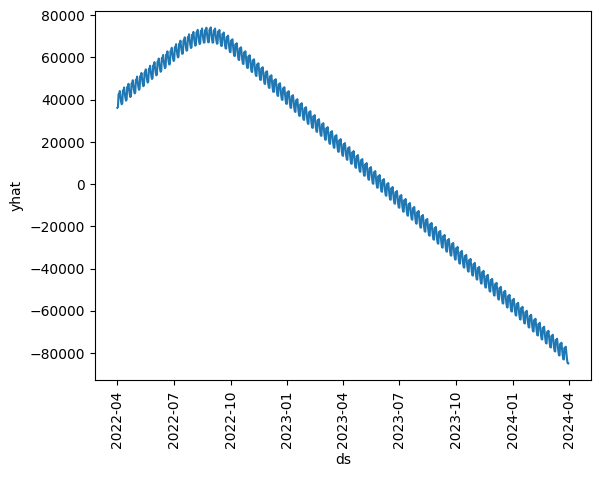

In [99]:
sns.lineplot(forecast, x="ds", y="yhat")
plt.xticks(rotation= 90)
plt.show()

In [114]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [110]:
future = m.make_future_dataframe(periods=24, freq='M')
forecas = m.predict(future)

In [111]:
forecas

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-04-01,39603.651060,4061.410881,66679.369466,39603.651060,39603.651060,-3464.762666,-3464.762666,-3464.762666,-3464.762666,-3464.762666,-3464.762666,0.0,0.0,0.0,36138.888394
1,2022-04-02,39848.029048,4928.318664,66398.788320,39848.029048,39848.029048,-3322.580929,-3322.580929,-3322.580929,-3322.580929,-3322.580929,-3322.580929,0.0,0.0,0.0,36525.448120
2,2022-04-03,40092.407037,13755.811066,74167.475376,40092.407037,40092.407037,2484.027506,2484.027506,2484.027506,2484.027506,2484.027506,2484.027506,0.0,0.0,0.0,42576.434543
3,2022-04-04,40336.785025,11568.004646,72548.153927,40336.785025,40336.785025,2049.156995,2049.156995,2049.156995,2049.156995,2049.156995,2049.156995,0.0,0.0,0.0,42385.942020
4,2022-04-05,40581.163014,15804.003558,75080.174208,40581.163014,40581.163014,3519.534691,3519.534691,3519.534691,3519.534691,3519.534691,3519.534691,0.0,0.0,0.0,44100.697705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2024-11-30,-147837.097346,-218156.890818,-87925.529335,-204860.024976,-93763.951254,-3322.580929,-3322.580929,-3322.580929,-3322.580929,-3322.580929,-3322.580929,0.0,0.0,0.0,-151159.678275
385,2024-12-31,-156214.737303,-225447.089457,-87423.577136,-218241.618391,-97855.568875,3519.534691,3519.534691,3519.534691,3519.534691,3519.534691,3519.534691,0.0,0.0,0.0,-152695.202612
386,2025-01-31,-164592.377260,-239084.844192,-97141.924983,-231501.292466,-102044.312355,-3464.762666,-3464.762666,-3464.762666,-3464.762666,-3464.762666,-3464.762666,0.0,0.0,0.0,-168057.139926
387,2025-02-28,-172159.277866,-253888.004834,-104488.561574,-243710.064716,-105673.219731,-3464.762666,-3464.762666,-3464.762666,-3464.762666,-3464.762666,-3464.762666,0.0,0.0,0.0,-175624.040532


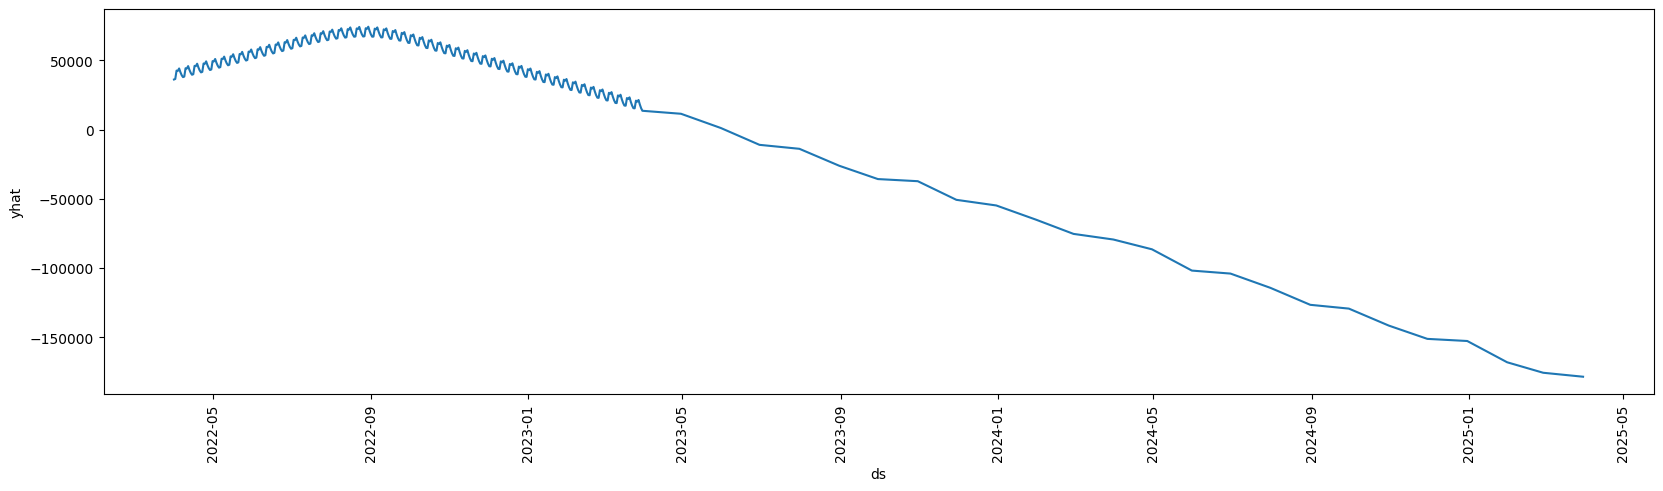